In [1]:
import numpy as np
import scipy.io
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [15]:
# Parameters for the geometry
inner_cylinder_radius = 8
outer_cylinder_radius = 4
inner_cylinder_distance = 2.5 * inner_cylinder_radius # How far the middle of the cylinders are apart
outer_cylinder_distance = inner_cylinder_distance + inner_cylinder_radius + 2.5*outer_cylinder_radius
pitch = (outer_cylinder_distance + 5*outer_cylinder_radius)*2 + 25 # How far the middle of the groups are apart
height_plenum = 25
height = 400

# Create the file content
file_content = []

# Infinite graphite
file_content.append("%------ Define Surfaces -----")
file_content.append(f"surf s1 hexxprism 0 0 230 0 {height+10}")
file_content.append(f"surf s2 cyl 0 0 {inner_cylinder_radius} 0 {height - height_plenum}") # The cyl in the middle

for i in range(5):
    angle = 72*np.pi/180 * i
        
    x = inner_cylinder_distance * np.sin(angle)
    y = inner_cylinder_distance * np.cos(angle)

    file_content.append(f"surf s{i + 3} cyl {x} {y} {inner_cylinder_radius} 0 {height - height_plenum}")
    
for i in range(12):
    angle = 30*np.pi/180 * i
    
    x = (outer_cylinder_distance) * np.sin(angle)
    y = (outer_cylinder_distance) * np.cos(angle)
    
    file_content.append(f"surf s{i + 8} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

for i in range(12):
    angle = 30*np.pi/180 * i + 15*np.pi/180
    
    x = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.sin(angle)
    y = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.cos(angle)
    
    file_content.append(f"surf s{i + 20} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

file_content.append(f"surf s32 sph 0 0 {height-height_plenum} {outer_cylinder_distance + 4*outer_cylinder_radius}")
file_content.append(f"surf s33 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} 0 {height-height_plenum}")
file_content.append(f"surf s34 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height-height_plenum} {height}")
file_content.append(f"surf s35 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height} {height+10}")

file_content.append(f"surf s36 hexxprism 0 0 250 -450 {height+60}")
file_content.append(f"surf s37 hexxprism 0 0 230 -400 {height}")

file_content.append("\n%------ Define Cells -----")

for i in range(30):
    file_content.append(f"cell c{i + 1} u1 salt -s{i + 2}")
        
file_content.append("cell c31 u1 graphite -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c32 u1 salt -s32 s33 s35")
file_content.append("cell c33 u1 graphite -s34 s32")
file_content.append("cell c34 u1 graphite -s35")
file_content.append("cell c35 0 graphite2 -s36 s1 s37")
file_content.append("cell c36 0 void -s37 s1")

for i in range(7):
    file_content.append(f"""\npin p{i + 1} 
fill u1 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p8 
void""")

file_content.append(f"""\nlat l1 3 0 0 5 5 {pitch} 
p8 p8 p8 p8 p8 
 p8 p8 p6 p7 p8 
  p8 p5 p1 p2 p8 
   p8 p4 p3 p8 p8 
    p8 p8 p8 p8 p8""")

file_content.append(f"\ncell c100 0 fill l1 -s1")
file_content.append(f"cell c101 0 outside s36")

# Save to a inp file
with open("geometrymixtest.inp", "w") as file:
    file.write("\n".join(file_content))

print("Geometry file 'geometrymixtest.inp' generated.")

Geometry file 'geometrymixtest.inp' generated.


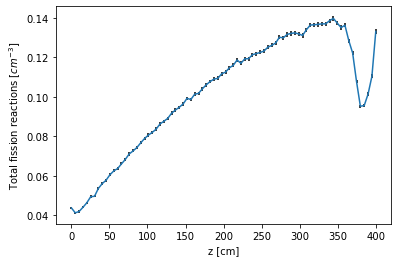

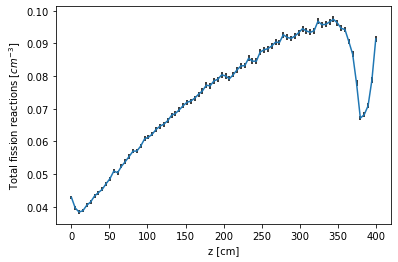

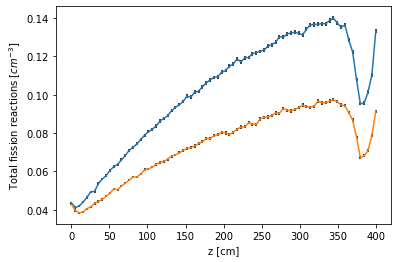

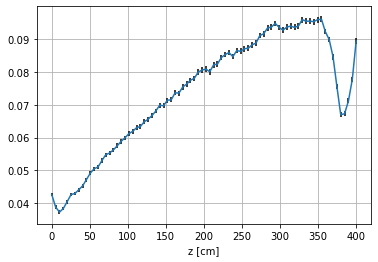

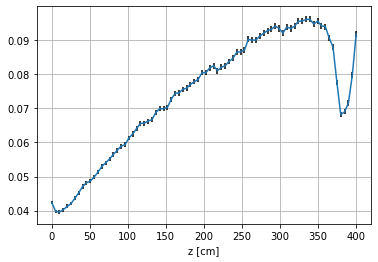

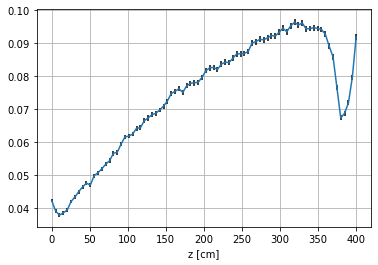

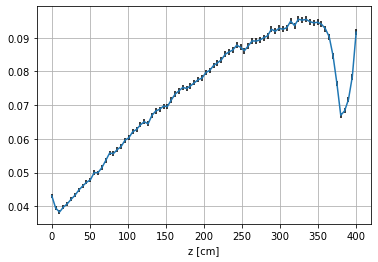

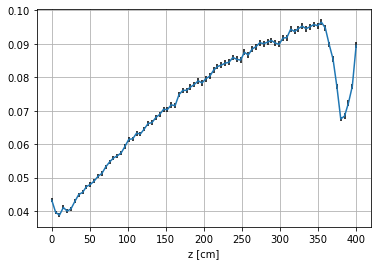

In [88]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\mixtest\mixtest.mat'
mat_data = scipy.io.loadmat(mat_file_path)

DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']
DETpin3 = mat_data['DETpin3']
DETpin4 = mat_data['DETpin4']
DETpin5 = mat_data['DETpin5']
DETpin6 = mat_data['DETpin6']
DETpin7 = mat_data['DETpin7']

fission1 = DETpin1[:, -2]
error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

fission3 = DETpin3[:, -2]
error3 = DETpin3[:, -1]*fission3

fission4 = DETpin4[:, -2]
error4 = DETpin4[:, -1]*fission4

fission5 = DETpin5[:, -2]
error5 = DETpin5[:, -1]*fission5

fission6 = DETpin6[:, -2]
error6 = DETpin6[:, -1]*fission6

fission7 = DETpin7[:, -2]
error7 = DETpin7[:, -1]*fission7

z = np.linspace(0, 400, 80)

plt.errorbar(z, fission1, error1, ecolor = 'black')
# plt.title('Pin 1 (middle)')
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
# plt.grid()
plt.savefig(r'Figures\Fission middle pin', dpi=300)
plt.show()

plt.errorbar(z, fission2, error2, ecolor = 'black')
# plt.title('Pin 2 (outer)')
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
# plt.grid()
plt.savefig(r'Figures\Fission outer pin', dpi=300)
plt.show()

plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Center segment')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
# plt.title('Pin 2 (outer)')
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
# plt.grid()
plt.savefig(r'Figures\Fission at t0', dpi=300)
plt.show()

plt.errorbar(z, fission3, error3, ecolor = 'black')
# plt.title('Middle fuel channel')
plt.xlabel('z [cm]')
# plt.ylabel('Total fission')
plt.grid()
plt.show()

plt.errorbar(z, fission4, error4, ecolor = 'black')
# plt.title('Pentagon fuel channel')
plt.xlabel('z [cm]')
# plt.ylabel('Total fission')
plt.grid()
plt.show()

plt.errorbar(z, fission5, error5, ecolor = 'black')
# plt.title('Outer ring fuel channel')
plt.xlabel('z [cm]')
# plt.ylabel('Total fission')
plt.grid()
plt.show()

plt.errorbar(z, fission6, error6, ecolor = 'black')
# plt.title('Outer ring fuel channel')
plt.xlabel('z [cm]')
# plt.ylabel('Total fission')
plt.grid()
plt.show()

plt.errorbar(z, fission7, error7, ecolor = 'black')
# plt.title('Outer ring fuel channel')
plt.xlabel('z [cm]')
# plt.ylabel('Total fission')
plt.grid()
plt.show()

np.save('fission1.npy', fission1)
np.save('fission2.npy', fission2)
# np.save('fission3.npy', fission3)
# np.save('fission4.npy', fission4)
# np.save('fission5.npy', fission5)
# np.save('fission6.npy', fission6)
# np.save('fission7.npy', fission7)

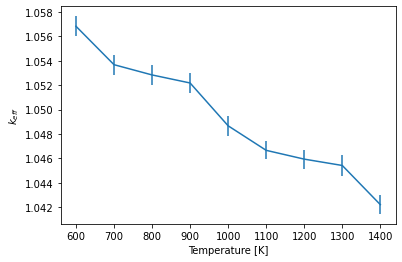

-1.827499999999982e-05

In [77]:
temperature = [600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
k_eff_analog = [1.05803, 1.05218, 1.05447, 1.05126, 1.04773, 1.04605, 1.04666, 1.04655, 1.04108]
k_eff_analog_error = [0.00166, 0.00155, 0.00160, 0.00163, 0.00193, 0.00203, 0.00187, 0.00193, 0.00172]
k_eff_implicit = [1.05683, 1.05368, 1.05284, 1.05218, 1.04867, 1.04666, 1.04594, 1.04542, 1.04221]
k_eff_implicit_error = [0.00082, 0.00083, 0.00080, 0.00084, 0.00084, 0.00074, 0.00078, 0.00083, 0.00076]


# plt.errorbar(temperature, k_eff_analog, k_eff_analog_error, label = 'Analog')
plt.errorbar(temperature, k_eff_implicit, k_eff_implicit_error, label = 'Implicit')
# plt.grid()
# plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'$k_{eff}$')
plt.savefig(f'Figures\keff middle', dpi = 300)
plt.show()

(k_eff_implicit[-1]-k_eff_implicit[0])/800

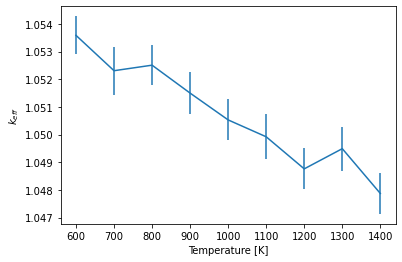

-7.399999999999906e-06

In [78]:
temperature = [600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
k_eff_analog = [1.05334, 1.04937, 1.05180, 1.05059, 1.04894, 1.05036, 1.04911, 1.05197, 1.04742]
k_eff_analog_error = [0.00153, 0.00176, 0.00175, 0.00177, 0.00185, 0.00185, 0.00195, 0.00166, 0.00164]
k_eff_implicit = [1.05359, 1.05231, 1.05251, 1.05150, 1.05053, 1.04992, 1.04876, 1.04949, 1.04787]
k_eff_implicit_error = [0.00069, 0.00087, 0.00072, 0.00076, 0.00074, 0.00081, 0.00074, 0.00080, 0.00074]

# plt.errorbar(temperature, k_eff_analog, k_eff_analog_error, label = 'Analog')
plt.errorbar(temperature, k_eff_implicit, k_eff_implicit_error, label = 'Implicit')
# plt.grid()
# plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'$k_{eff}$')
plt.savefig(f'Figures\keff outer', dpi = 300)
plt.show()

(k_eff_analog[-1]-k_eff_analog[0])/800

In [31]:
# Parameters for the geometry
inner_cylinder_radius = 8
outer_cylinder_radius = 4
inner_cylinder_distance = 2.5 * inner_cylinder_radius # How far the middle of the cylinders are apart
outer_cylinder_distance = inner_cylinder_distance + inner_cylinder_radius + 2.5*outer_cylinder_radius
pitch = (outer_cylinder_distance + 5*outer_cylinder_radius)*2 + 25 # How far the middle of the groups are apart
height_plenum = 25
height = 400

# Create the file content
file_content = []

# Infinite graphite
file_content.append("%------ Define Surfaces -----")
file_content.append(f"surf s1 hexxprism 0 0 230 0 {height+10}")
file_content.append(f"surf s2 cyl 0 0 {inner_cylinder_radius} 0 {height - height_plenum}") # The cyl in the middle

for i in range(5):
    angle = 72*np.pi/180 * i
        
    x = inner_cylinder_distance * np.sin(angle)
    y = inner_cylinder_distance * np.cos(angle)

    file_content.append(f"surf s{i + 3} cyl {x} {y} {inner_cylinder_radius} 0 {height - height_plenum}")
    
for i in range(12):
    angle = 30*np.pi/180 * i
    
    x = (outer_cylinder_distance) * np.sin(angle)
    y = (outer_cylinder_distance) * np.cos(angle)
    
    file_content.append(f"surf s{i + 8} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

for i in range(12):
    angle = 30*np.pi/180 * i + 15*np.pi/180
    
    x = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.sin(angle)
    y = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.cos(angle)
    
    file_content.append(f"surf s{i + 20} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

file_content.append(f"surf s32 sph 0 0 {height-height_plenum} {outer_cylinder_distance + 4*outer_cylinder_radius}")
file_content.append(f"surf s33 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} 0 {height-height_plenum}")
file_content.append(f"surf s34 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height-height_plenum} {height}")
file_content.append(f"surf s35 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height} {height+10}")

file_content.append(f"surf s36 hexxprism 0 0 250 -450 {height+60}")
file_content.append(f"surf s37 hexxprism 0 0 230 -400 {height}")

file_content.append("\n%------ Define Cells -----")

for i in range(30):
    file_content.append(f"cell c{i + 1} u1 salt1 -s{i + 2}")
        
file_content.append("cell c31 u1 graphite1 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c32 u1 salt1 -s32 s33 s35")
file_content.append("cell c33 u1 graphite1 -s34 s32")
file_content.append("cell c34 u1 graphite1 -s35")

file_content.append("cell c35 0 graphite3 -s36 s1 s37")
file_content.append("cell c36 0 void -s37 s1")

for i in range(30):
    file_content.append(f"cell c{i + 37} u2 salt2 -s{i + 2}")
    
file_content.append("cell c67 u2 graphite2 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c68 u2 salt2 -s32 s33 s35")
file_content.append("cell c69 u2 graphite2 -s34 s32")
file_content.append("cell c70 u2 graphite2 -s35")    


file_content.append(f"""\npin p1 
fill u1 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

for i in range(6):
    file_content.append(f"""\npin p{i+2} 
fill u2 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p8 
void""")

file_content.append(f"""\nlat l1 3 0 0 5 5 {pitch} 
p8 p8 p8 p8 p8 
 p8 p8 p6 p7 p8 
  p8 p5 p1 p2 p8 
   p8 p4 p3 p8 p8 
    p8 p8 p8 p8 p8""")

file_content.append(f"\ncell c100 0 fill l1 -s1")
file_content.append(f"cell c101 0 outside s36")

# Save to a inp file
with open("geometrytransient.inp", "w") as file:
    file.write("\n".join(file_content))

print("Geometry file 'geometrytransient.inp' generated.")

Geometry file 'geometrytransient.inp' generated.


In [29]:
# Parameters for the geometry
inner_cylinder_radius = 8
outer_cylinder_radius = 4
inner_cylinder_distance = 2.5 * inner_cylinder_radius # How far the middle of the cylinders are apart
outer_cylinder_distance = inner_cylinder_distance + inner_cylinder_radius + 2.5*outer_cylinder_radius
pitch = (outer_cylinder_distance + 5*outer_cylinder_radius)*2 + 25 # How far the middle of the groups are apart
height_plenum = 25
height = 400

# Create the file content
file_content = []

# Infinite graphite
file_content.append("%------ Define Surfaces -----")
file_content.append(f"surf s1 hexxprism 0 0 230 0 {height+10}")
file_content.append(f"surf s2 cyl 0 0 {inner_cylinder_radius} 0 {height - height_plenum}") # The cyl in the middle

for i in range(5):
    angle = 72*np.pi/180 * i
        
    x = inner_cylinder_distance * np.sin(angle)
    y = inner_cylinder_distance * np.cos(angle)

    file_content.append(f"surf s{i + 3} cyl {x} {y} {inner_cylinder_radius} 0 {height - height_plenum}")
    
for i in range(12):
    angle = 30*np.pi/180 * i
    
    x = (outer_cylinder_distance) * np.sin(angle)
    y = (outer_cylinder_distance) * np.cos(angle)
    
    file_content.append(f"surf s{i + 8} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

for i in range(12):
    angle = 30*np.pi/180 * i + 15*np.pi/180
    
    x = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.sin(angle)
    y = (outer_cylinder_distance + 3 * outer_cylinder_radius) * np.cos(angle)
    
    file_content.append(f"surf s{i + 20} cyl {x} {y} {outer_cylinder_radius} 0 {height - height_plenum}")

file_content.append(f"surf s32 sph 0 0 {height-height_plenum} {outer_cylinder_distance + 4*outer_cylinder_radius}")
file_content.append(f"surf s33 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} 0 {height-height_plenum}")
file_content.append(f"surf s34 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height-height_plenum} {height}")
file_content.append(f"surf s35 cyl 0 0 {outer_cylinder_distance + 6*outer_cylinder_radius} {height} {height+10}")

file_content.append(f"surf s36 hexxprism 0 0 250 -450 {height+60}")
file_content.append(f"surf s37 hexxprism 0 0 230 -400 {height}")

file_content.append("\n%------ Define Cells -----")

for i in range(30):
    file_content.append(f"cell c{i + 1} u1 salt1 -s{i + 2}")
        
file_content.append("cell c31 u1 graphite1 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c32 u1 salt1 -s32 s33 s35")
file_content.append("cell c33 u1 graphite1 -s34 s32")
file_content.append("cell c34 u1 graphite1 -s35")

file_content.append("cell c35 0 graphite8 -s36 s1 s37")
file_content.append("cell c36 0 void -s37 s1")

for i in range(30):
    file_content.append(f"cell c{i + 37} u2 salt2 -s{i + 2}")
    
file_content.append("cell c67 u2 graphite2 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c68 u2 salt2 -s32 s33 s35")
file_content.append("cell c69 u2 graphite2 -s34 s32")
file_content.append("cell c70 u2 graphite2 -s35")  

for i in range(30):
    file_content.append(f"cell c{i + 71} u3 salt3 -s{i + 2}")
    
file_content.append("cell c101 u3 graphite3 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c102 u3 salt3 -s32 s33 s35")
file_content.append("cell c103 u3 graphite3 -s34 s32")
file_content.append("cell c104 u3 graphite3 -s35")   

for i in range(30):
    file_content.append(f"cell c{i + 105} u4 salt4 -s{i + 2}")
    
file_content.append("cell c135 u4 graphite4 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c136 u4 salt4 -s32 s33 s35")
file_content.append("cell c137 u4 graphite4 -s34 s32")
file_content.append("cell c138 u4 graphite4 -s35")   

for i in range(30):
    file_content.append(f"cell c{i + 139} u5 salt5 -s{i + 2}")
    
file_content.append("cell c169 u5 graphite5 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c170 u5 salt5 -s32 s33 s35")
file_content.append("cell c171 u5 graphite5 -s34 s32")
file_content.append("cell c172 u5 graphite5 -s35")   

for i in range(30):
    file_content.append(f"cell c{i + 173} u6 salt6 -s{i + 2}")
    
file_content.append("cell c203 u6 graphite6 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c204 u6 salt6 -s32 s33 s35")
file_content.append("cell c205 u6 graphite6 -s34 s32")
file_content.append("cell c206 u6 graphite6 -s35")   

for i in range(30):
    file_content.append(f"cell c{i + 207} u7 salt7 -s{i + 2}")
    
file_content.append("cell c237 u7 graphite7 -s33 s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12 s13 s14 s15 s16 s17 s18 s19 s20 s21 s22 s23 s24 s25 s26 s27 s28 s29 s30 s31")
file_content.append("cell c238 u7 salt7 -s32 s33 s35")
file_content.append("cell c239 u7 graphite7 -s34 s32")
file_content.append("cell c240 u7 graphite7 -s35")   


file_content.append(f"""\npin p1 
fill u1 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p2 
fill u2 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p3 
fill u3 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p4 
fill u4 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p5 
fill u5 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p6 
fill u6 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p7 
fill u7 {outer_cylinder_distance + 6*outer_cylinder_radius} 
void""")

file_content.append(f"""\npin p8 
void""")

file_content.append(f"""\nlat l1 3 0 0 5 5 {pitch} 
p8 p8 p8 p8 p8 
 p8 p8 p6 p7 p8 
  p8 p5 p1 p2 p8 
   p8 p4 p3 p8 p8 
    p8 p8 p8 p8 p8""")

file_content.append(f"\ncell c100 0 fill l1 -s1")
file_content.append(f"cell c101 0 outside s36")

# Save to a inp file
with open("geometrytransient2.inp", "w") as file:
    file.write("\n".join(file_content))

print("Geometry file 'geometrytransient2.inp' generated.")

Geometry file 'geometrytransient2.inp' generated.


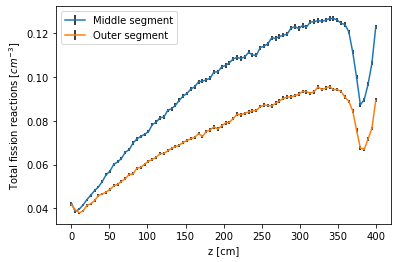

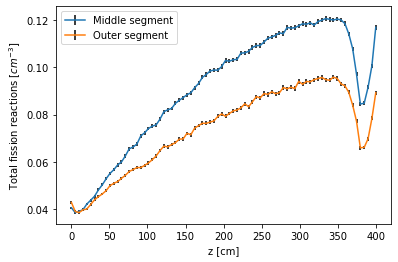

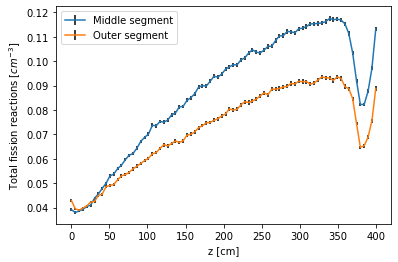

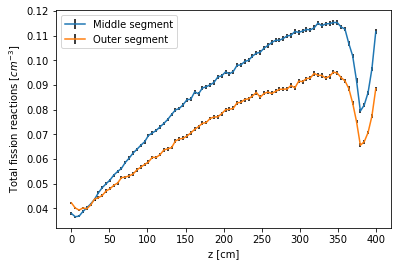

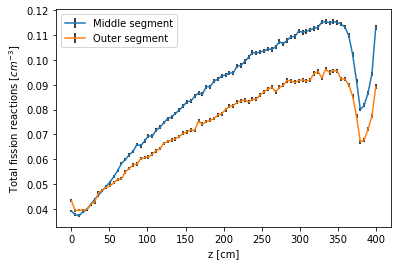

In [89]:
flux_t_list = np.array([100,200,400,600,800])

for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\Transient\transient{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    np.save(rf'ULOHS\fission1_{i}.npy', fission1)
    np.save(rf'ULOHS\fission2_{i}.npy', fission2)
    
#     print(np.sum(fission1))
    
    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
#     plt.title('Pin 1 (middle)')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\ULOHS\Fission at t{i}', dpi = 300)
    plt.show()

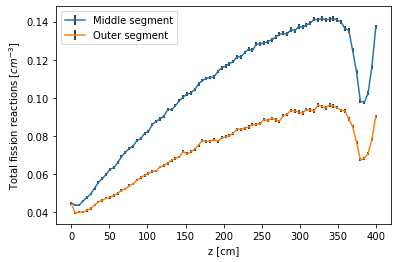

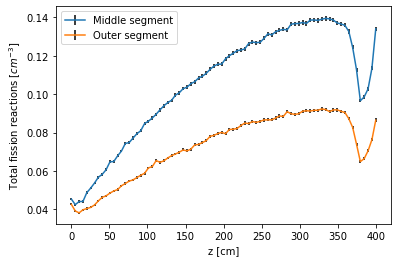

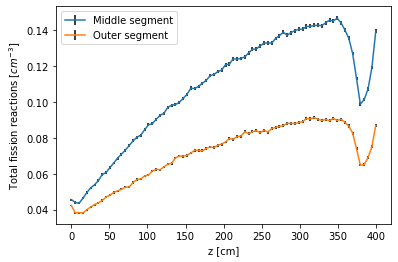

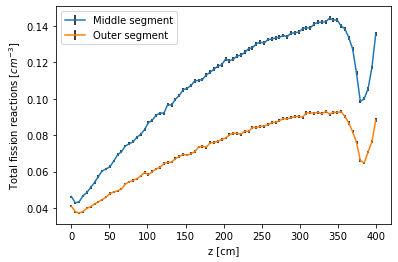

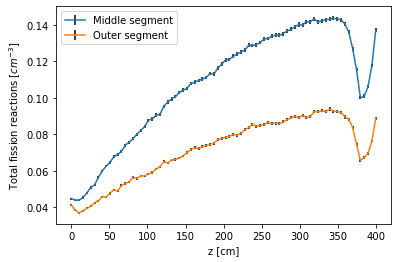

In [90]:
flux_t_list = np.array([50,100,200,300,400])

for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\UHOLS2\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    np.save(rf'ULOHS2\ULOHS2fission1_{i}.npy', fission1)
    np.save(rf'ULOHS2\ULOHS2fission2_{i}.npy', fission2)
        
    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
#     plt.title('Pin 1 (middle)')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\ULOHS2\ULOHS2 Fission at t{i}', dpi=300)
    plt.show()

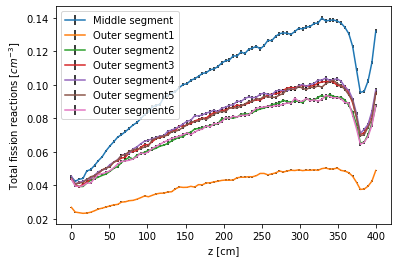

1.0748744475527021

In [91]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\ULOHS3\t10.mat'
mat_data = scipy.io.loadmat(mat_file_path)

z = np.linspace(0, 400, 80)


DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']
DETpin3 = mat_data['DETpin3']
DETpin4 = mat_data['DETpin4']
DETpin5 = mat_data['DETpin5']
DETpin6 = mat_data['DETpin6']
DETpin7 = mat_data['DETpin7']


fission1 = DETpin1[:, -2]
error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

fission3 = DETpin3[:, -2]
error3 = DETpin3[:, -1]*fission3

fission4 = DETpin4[:, -2]
error4 = DETpin4[:, -1]*fission4

fission5 = DETpin5[:, -2]
error5 = DETpin5[:, -1]*fission5

fission6 = DETpin6[:, -2]
error6 = DETpin6[:, -1]*fission6

fission7 = DETpin7[:, -2]
error7 = DETpin7[:, -1]*fission7

# flux1 = np.load('fission1.npy')
# flux2 = np.load('fission2.npy')

plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment1')
plt.errorbar(z, fission3, error3, ecolor = 'black', label = 'Outer segment2')
plt.errorbar(z, fission4, error4, ecolor = 'black', label = 'Outer segment3')
plt.errorbar(z, fission5, error5, ecolor = 'black', label = 'Outer segment4')
plt.errorbar(z, fission6, error6, ecolor = 'black', label = 'Outer segment5')
plt.errorbar(z, fission7, error7, ecolor = 'black', label = 'Outer segment6')
# plt.plot(z, flux1, label = 'Middle pin Normal')
# plt.plot(z, flux2, label = 'Outer pin Normal')
plt.legend()
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
plt.savefig(rf'Figures\2300K pin2', dpi=300)
plt.show()
np.save(rf'ULOHS3\ULOHS3fission1_10.npy', fission1)
np.save(rf'ULOHS3\ULOHS3fission2_10.npy', fission2)
np.save(rf'ULOHS3\ULOHS3fission3_10.npy', fission3)
np.save(rf'ULOHS3\ULOHS3fission4_10.npy', fission4)
np.save(rf'ULOHS3\ULOHS3fission5_10.npy', fission5)
np.save(rf'ULOHS3\ULOHS3fission6_10.npy', fission6)
np.save(rf'ULOHS3\ULOHS3fission7_10.npy', fission7)

np.sum(fission4)/np.sum(fission3)

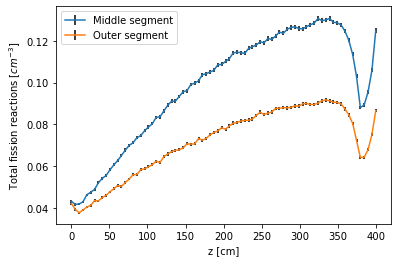

In [92]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\2ULOHS\t100.mat'
mat_data = scipy.io.loadmat(mat_file_path)

z = np.linspace(0, 400, 80)

DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']

fission1 = DETpin1[:, -2]
error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

# flux1 = np.load('fission1.npy')
# flux2 = np.load('fission2.npy')

plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
# # plt.plot(z, flux1, label = 'Middle pin Normal')
# plt.plot(z, flux2, label = 'Outer pin Normal')
plt.legend()
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
# plt.savefig(f'2300K pin2', dpi=300)
plt.show()
np.save(rf'2ULOHS\2ULOHSfission1_100.npy', fission1)
np.save(rf'2ULOHS\2ULOHSfission2_100.npy', fission2)

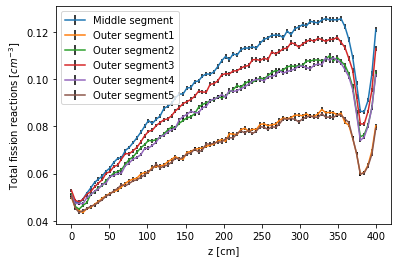

In [93]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\Outer Gone\gone.mat'
mat_data = scipy.io.loadmat(mat_file_path)

z = np.linspace(0, 400, 80)

DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']
DETpin3 = mat_data['DETpin3']
DETpin4 = mat_data['DETpin4']
DETpin5 = mat_data['DETpin5']
DETpin6 = mat_data['DETpin6']
# DETpin7 = mat_data['DETpin7']

fission1 = DETpin1[:, -2]
error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

fission3 = DETpin3[:, -2]
error3 = DETpin3[:, -1]*fission3

fission4 = DETpin4[:, -2]
error4 = DETpin4[:, -1]*fission4

fission5 = DETpin5[:, -2]
error5 = DETpin5[:, -1]*fission5

fission6 = DETpin6[:, -2]
error6 = DETpin6[:, -1]*fission6

# fission7 = DETpin7[:, -2]
# error7 = DETpin7[:, -1]*fission7

# flux1 = np.load('fission1.npy')
# flux2 = np.load('fission2.npy')

plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment1')
plt.errorbar(z, fission3, error3, ecolor = 'black', label = 'Outer segment2')
plt.errorbar(z, fission4, error4, ecolor = 'black', label = 'Outer segment3')
plt.errorbar(z, fission5, error5, ecolor = 'black', label = 'Outer segment4')
plt.errorbar(z, fission6, error6, ecolor = 'black', label = 'Outer segment5')
# plt.errorbar(z, fission7, error7, ecolor = 'black', label = 'Outer pin6')
# plt.plot(z, flux1, label = 'Middle pin Normal')
# plt.plot(z, flux2, label = 'Outer pin Normal')
plt.legend()
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
plt.savefig(rf'Figures\outergoneflux', dpi=300)
plt.show()
np.save(rf'Gone\gonefission1_10.npy', fission1)
np.save(rf'Gone\gonefission2_10.npy', fission2)
np.save(rf'Gone\gonefission3_10.npy', fission3)
np.save(rf'Gone\gonefission4_10.npy', fission4)
np.save(rf'Gone\gonefission5_10.npy', fission5)
np.save(rf'Gone\gonefission6_10.npy', fission6)
# np.save(rf'Gone\gonefission7_10.npy', fission7)

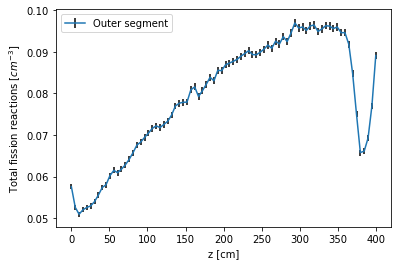

In [94]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\Inner Gone\innergone.mat'
mat_data = scipy.io.loadmat(mat_file_path)

z = np.linspace(0, 400, 80)

# DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']

# fission1 = DETpin1[:, -2]
# error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

# flux1 = np.load('fission1.npy')
# flux2 = np.load('fission2.npy')

# plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle pin')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
# plt.plot(z, flux1, label = 'Middle pin Normal')
# plt.plot(z, flux2, label = 'Outer pin Normal')
plt.legend()
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
plt.savefig(rf'Figures\innergoneflux', dpi=300)
plt.show()
# np.save(rf'Gone\gonefission1_10.npy', fission1)
np.save(rf'innergone\innergonefission2_10.npy', fission2)

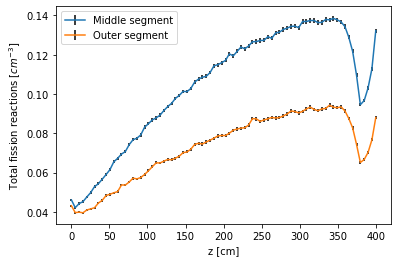

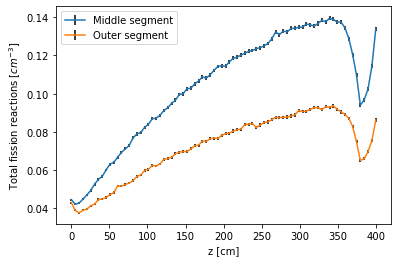

In [95]:
flux_t_list = np.array([50,100])
for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\FSOC\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    z = np.linspace(0, 400, 80)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    # flux1 = np.load('fission1.npy')
    # flux2 = np.load('fission2.npy')

    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
    # plt.plot(z, flux1, label = 'Middle pin Normal')
    # plt.plot(z, flux2, label = 'Outer pin Normal')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\FSOC\FSOCflux at t{i}', dpi=300)
    plt.show()
    np.save(rf'FSOC\FSOCfission1_{i}.npy', fission1)
    np.save(rf'FSOC\FSOCfission2_{i}.npy', fission2)

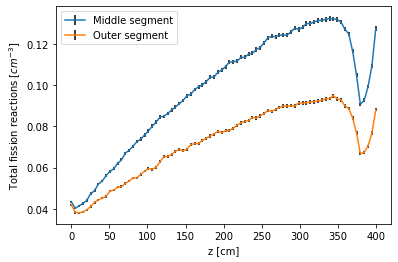

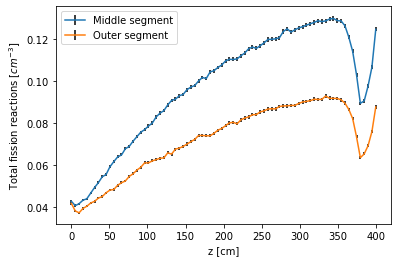

In [96]:
flux_t_list = np.array([50, 100])
for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\FSOC2\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    z = np.linspace(0, 400, 80)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    # flux1 = np.load('fission1.npy')
    # flux2 = np.load('fission2.npy')

    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
    # plt.plot(z, flux1, label = 'Middle pin Normal')
    # plt.plot(z, flux2, label = 'Outer pin Normal')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\FSOC2\FSOC2flux at t{i}', dpi=300)
    plt.show()
    np.save(rf'FSOC2\FSOC2fission1_{i}.npy', fission1)
    np.save(rf'FSOC2\FSOC2fission2_{i}.npy', fission2)

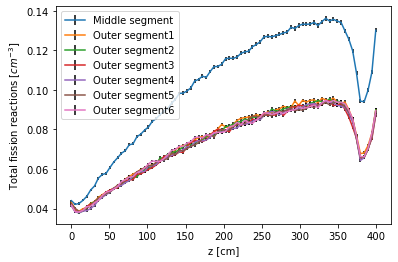

In [97]:
mat_file_path = r'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\FSOC3\t100.mat'
mat_data = scipy.io.loadmat(mat_file_path)

z = np.linspace(0, 400, 80)

DETpin1 = mat_data['DETpin1']
DETpin2 = mat_data['DETpin2']
DETpin3 = mat_data['DETpin3']
DETpin4 = mat_data['DETpin4']
DETpin5 = mat_data['DETpin5']
DETpin6 = mat_data['DETpin6']
DETpin7 = mat_data['DETpin7']

fission1 = DETpin1[:, -2]
error1 = DETpin1[:, -1]*fission1

fission2 = DETpin2[:, -2]
error2 = DETpin2[:, -1]*fission2

fission3 = DETpin3[:, -2]
error3 = DETpin3[:, -1]*fission3

fission4 = DETpin4[:, -2]
error4 = DETpin4[:, -1]*fission4

fission5 = DETpin5[:, -2]
error5 = DETpin5[:, -1]*fission5

fission6 = DETpin6[:, -2]
error6 = DETpin6[:, -1]*fission6

fission7 = DETpin7[:, -2]
error7 = DETpin7[:, -1]*fission7

# flux1 = np.load('fission1.npy')
# flux2 = np.load('fission2.npy')

plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment1')
plt.errorbar(z, fission3, error3, ecolor = 'black', label = 'Outer segment2')
plt.errorbar(z, fission4, error4, ecolor = 'black', label = 'Outer segment3')
plt.errorbar(z, fission5, error5, ecolor = 'black', label = 'Outer segment4')
plt.errorbar(z, fission6, error6, ecolor = 'black', label = 'Outer segment5')
plt.errorbar(z, fission7, error7, ecolor = 'black', label = 'Outer segment6')
# plt.plot(z, flux1, label = 'Middle pin Normal')
# plt.plot(z, flux2, label = 'Outer pin Normal')
plt.legend()
plt.xlabel('z [cm]')
plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
plt.savefig(rf'Figures\FSOC3\FSOC3flux', dpi=300)
plt.show()
np.save(rf'FSOC3\FSOC3fission1_100.npy', fission1)
np.save(rf'FSOC3\FSOC3fission2_100.npy', fission2)
np.save(rf'FSOC3\FSOC3fission3_100.npy', fission3)
np.save(rf'FSOC3\FSOC3fission4_100.npy', fission4)
np.save(rf'FSOC3\FSOC3fission5_100.npy', fission5)
np.save(rf'FSOC3\FSOC3fission6_100.npy', fission6)
np.save(rf'FSOC3\FSOC3fission7_100.npy', fission7)

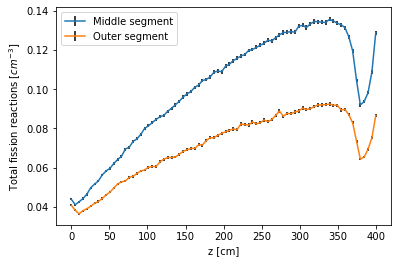

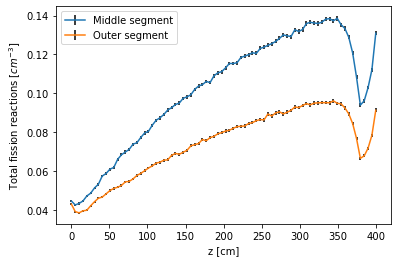

In [98]:
flux_t_list = np.array([50,100])
for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\flow1\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    z = np.linspace(0, 400, 80)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    # flux1 = np.load('fission1.npy')
    # flux2 = np.load('fission2.npy')

    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
    # plt.plot(z, flux1, label = 'Middle pin Normal')
    # plt.plot(z, flux2, label = 'Outer pin Normal')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\flow1\flow1flux at t{i}', dpi=300)
    plt.show()
    np.save(rf'flow1\flow1fission1_{i}.npy', fission1)
    np.save(rf'flow1\flow1fission2_{i}.npy', fission2)

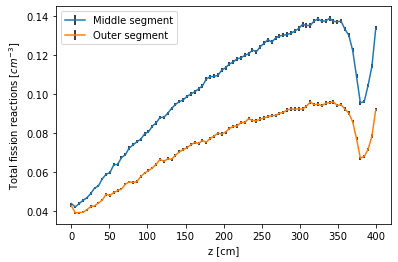

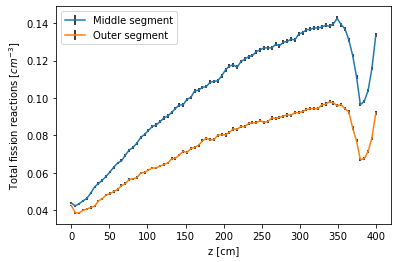

In [99]:
flux_t_list = np.array([50,100])
for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\flow2\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    z = np.linspace(0, 400, 80)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    # flux1 = np.load('fission1.npy')
    # flux2 = np.load('fission2.npy')

    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment')
    # plt.plot(z, flux1, label = 'Middle pin Normal')
    # plt.plot(z, flux2, label = 'Outer pin Normal')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\flow2\flow2flux at t{i}', dpi=300)
    plt.show()
    np.save(rf'flow2\flow2fission1_{i}.npy', fission1)
    np.save(rf'flow2\flow2fission2_{i}.npy', fission2)

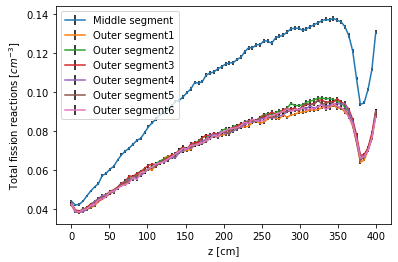

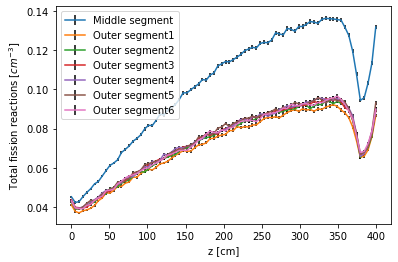

In [100]:
flux_t_list = np.array([50,100])
for i in flux_t_list:
    mat_file_path = rf'C:\Users\Isaak\OneDrive\Documenten\Delft\Master\flow3\t{i}.mat'
    mat_data = scipy.io.loadmat(mat_file_path)

    z = np.linspace(0, 400, 80)

    DETpin1 = mat_data['DETpin1']
    DETpin2 = mat_data['DETpin2']
    DETpin3 = mat_data['DETpin3']
    DETpin4 = mat_data['DETpin4']
    DETpin5 = mat_data['DETpin5']
    DETpin6 = mat_data['DETpin6']
    DETpin7 = mat_data['DETpin7']

    fission1 = DETpin1[:, -2]
    error1 = DETpin1[:, -1]*fission1

    fission2 = DETpin2[:, -2]
    error2 = DETpin2[:, -1]*fission2

    fission3 = DETpin3[:, -2]
    error3 = DETpin3[:, -1]*fission3

    fission4 = DETpin4[:, -2]
    error4 = DETpin4[:, -1]*fission4

    fission5 = DETpin5[:, -2]
    error5 = DETpin5[:, -1]*fission5

    fission6 = DETpin6[:, -2]
    error6 = DETpin6[:, -1]*fission6

    fission7 = DETpin7[:, -2]
    error7 = DETpin7[:, -1]*fission7

    # flux1 = np.load('fission1.npy')
    # flux2 = np.load('fission2.npy')

    plt.errorbar(z, fission1, error1, ecolor = 'black', label = 'Middle segment')
    plt.errorbar(z, fission2, error2, ecolor = 'black', label = 'Outer segment1')
    plt.errorbar(z, fission3, error3, ecolor = 'black', label = 'Outer segment2')
    plt.errorbar(z, fission4, error4, ecolor = 'black', label = 'Outer segment3')
    plt.errorbar(z, fission5, error5, ecolor = 'black', label = 'Outer segment4')
    plt.errorbar(z, fission6, error6, ecolor = 'black', label = 'Outer segment5')
    plt.errorbar(z, fission7, error7, ecolor = 'black', label = 'Outer segment6')
    # plt.plot(z, flux1, label = 'Middle pin Normal')
    # plt.plot(z, flux2, label = 'Outer pin Normal')
    plt.legend()
    plt.xlabel('z [cm]')
    plt.ylabel(r'Total fission reactions [$cm^{-3}$]')
    plt.savefig(rf'Figures\flow3\flow3flux at t{i}', dpi=300)
    plt.show()
    np.save(rf'flow3\flow3fission1_{i}.npy', fission1)
    np.save(rf'flow3\flow3fission2_{i}.npy', fission2)
    np.save(rf'flow3\flow3fission3_{i}.npy', fission3)
    np.save(rf'flow3\flow3fission4_{i}.npy', fission4)
    np.save(rf'flow3\flow3fission5_{i}.npy', fission5)
    np.save(rf'flow3\flow3fission6_{i}.npy', fission6)
    np.save(rf'flow3\flow3fission7_{i}.npy', fission7)